## 数据分析图

### 1.相关系数矩阵热力图

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm, probplot
warnings.filterwarnings('ignore')
plt.rc('font',family='serif',size=12)

利用鸢尾花数据集画一些图

In [2]:
data = sns.load_dataset("iris")

species_dict = {'setosa':0, 'virginica':1, 'versicolor':2}
data['species'] = data['species'].apply(lambda x: species_dict[x])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [3]:
def plot_heatmap(data):
    plt.figure(figsize=(20, 16),dpi=200)  
    
    mcorr = data.corr(method="spearman")  
    mask = np.zeros_like(mcorr, dtype=np.bool)  
    mask[np.triu_indices_from(mask)] = True  

    g = sns.heatmap(mcorr, mask=mask,  square=True, cmap="Blues",
                    annot=True, fmt='0.2f')
    
    plt.show()

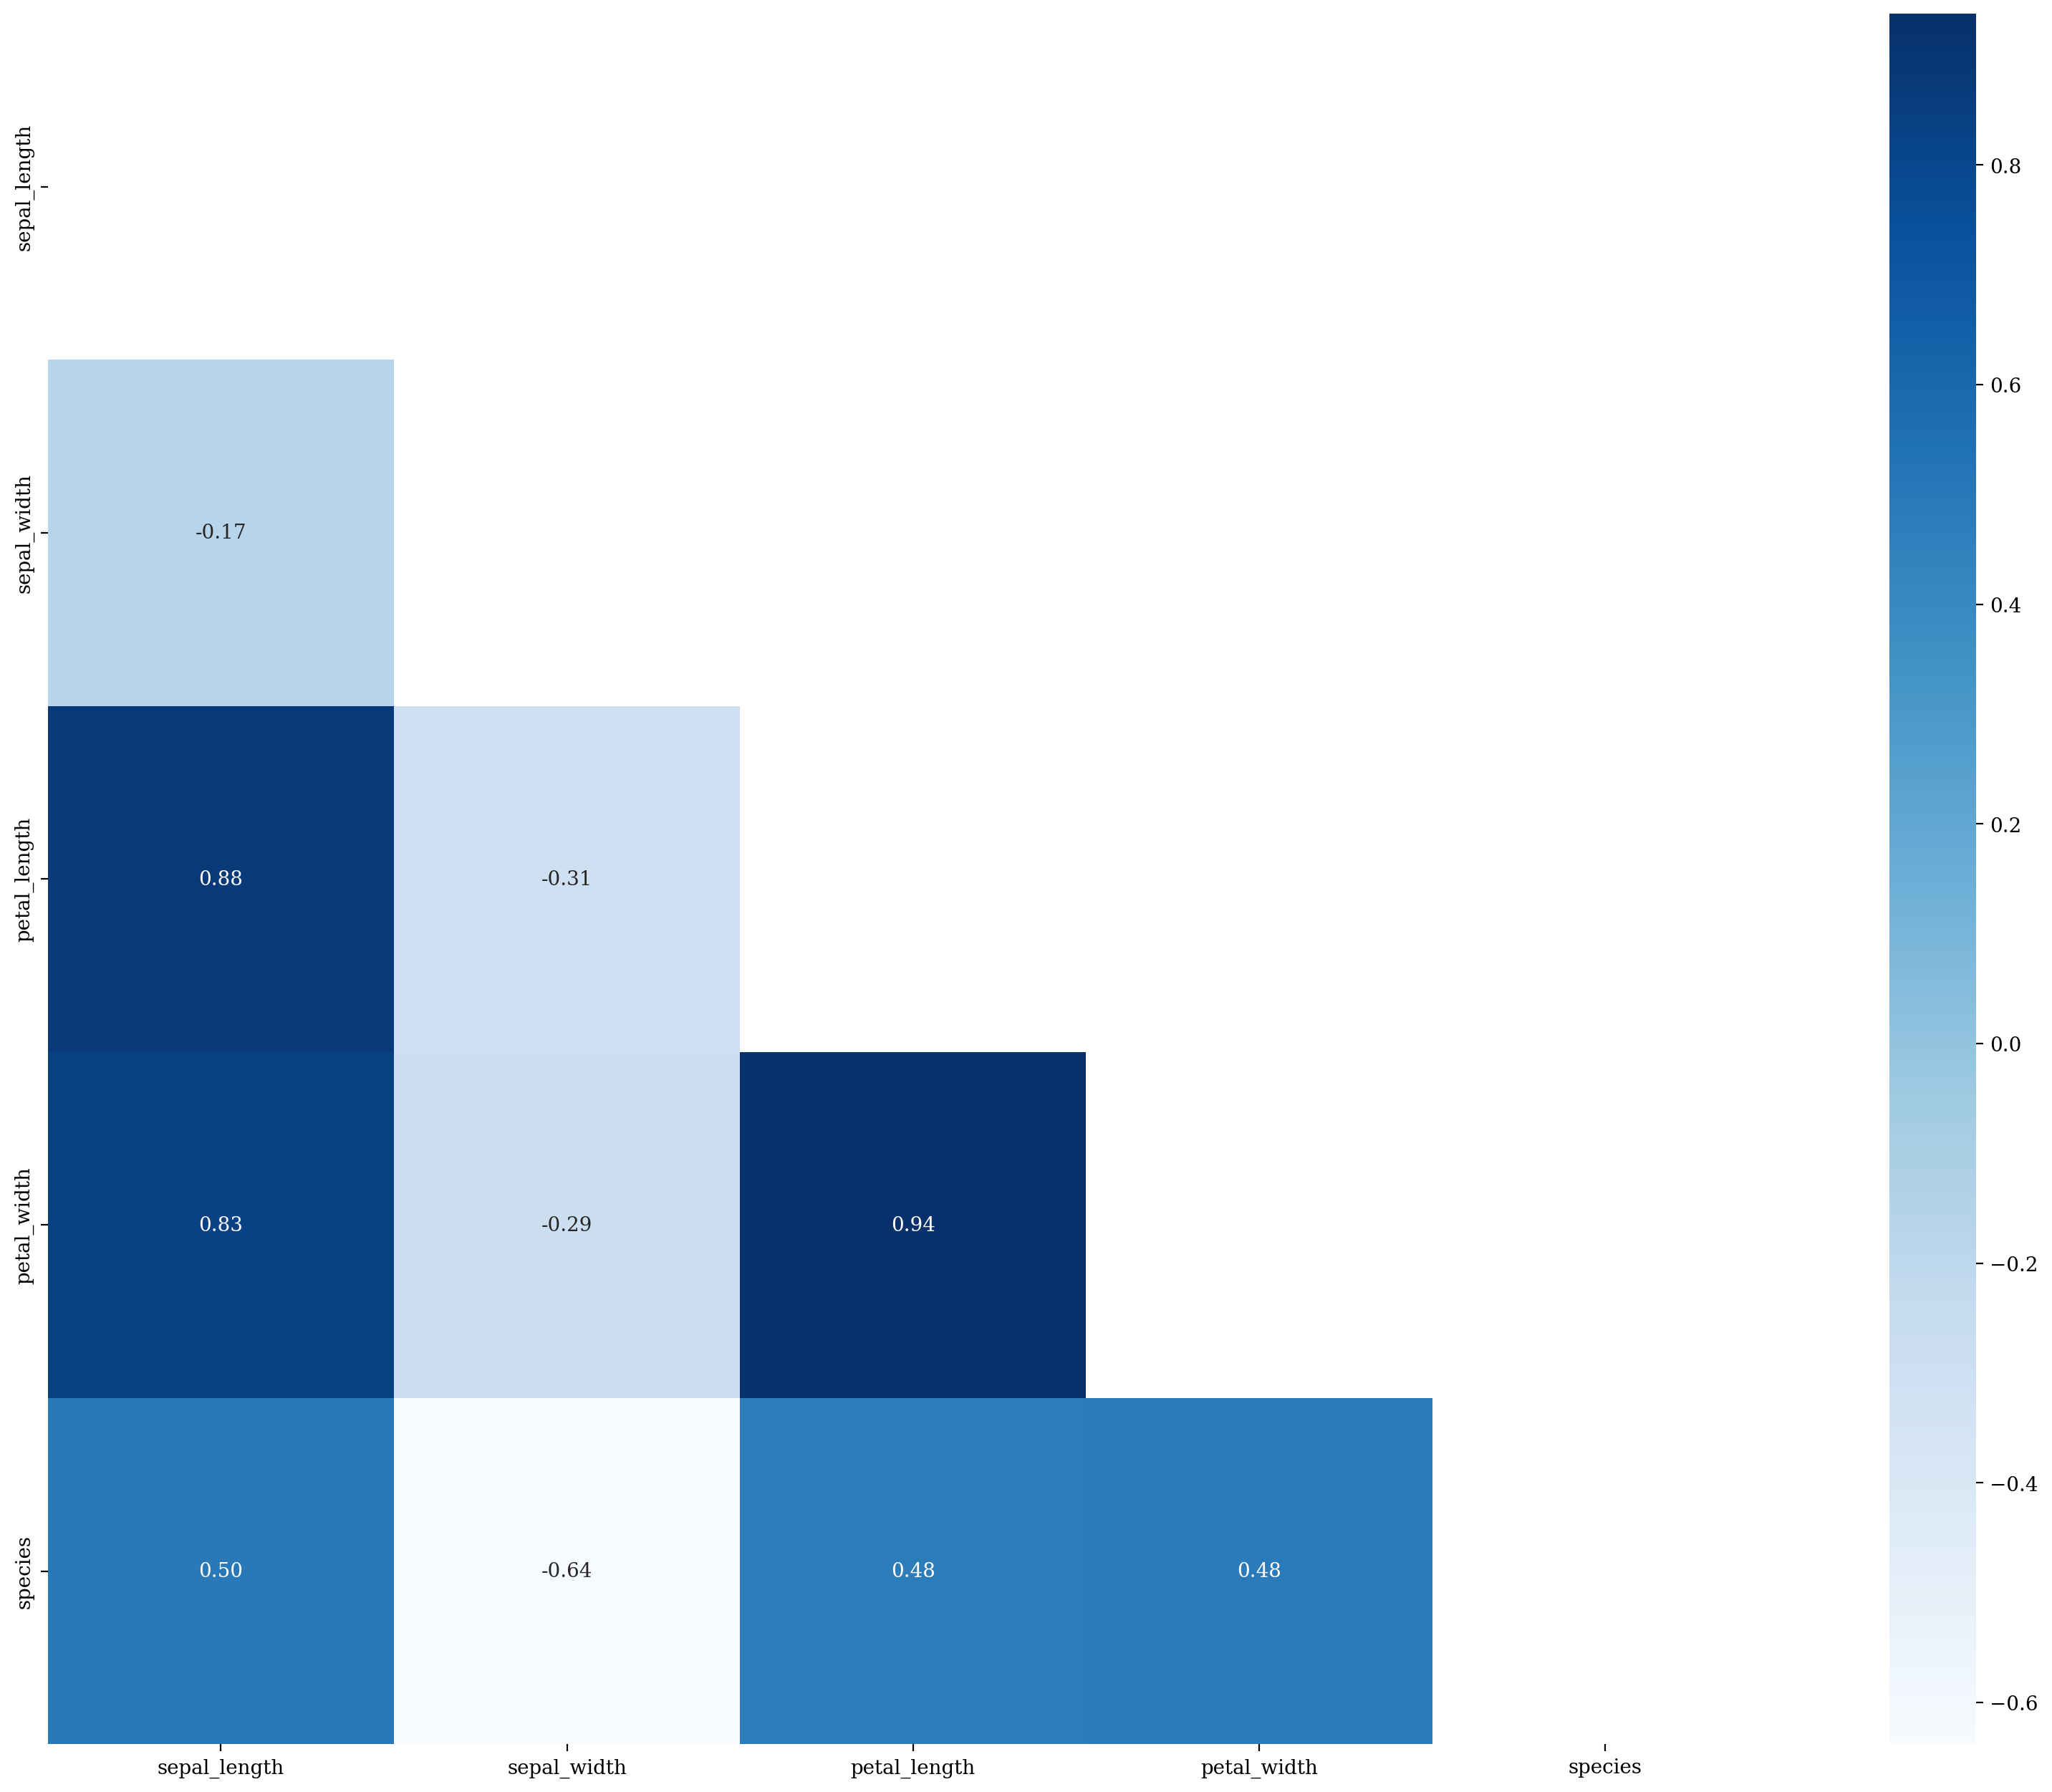

In [4]:
plot_heatmap(data)

### 2. 查看缺失值情况

In [5]:
def plot_missing_value(data):
    plt.figure(figsize=(10,8),dpi=200)
    plt.title('Missing Value Status',fontweight='bold')
    ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='Blues')
    ax.set_xlabel('Missing Sample Number')
    plt.show()

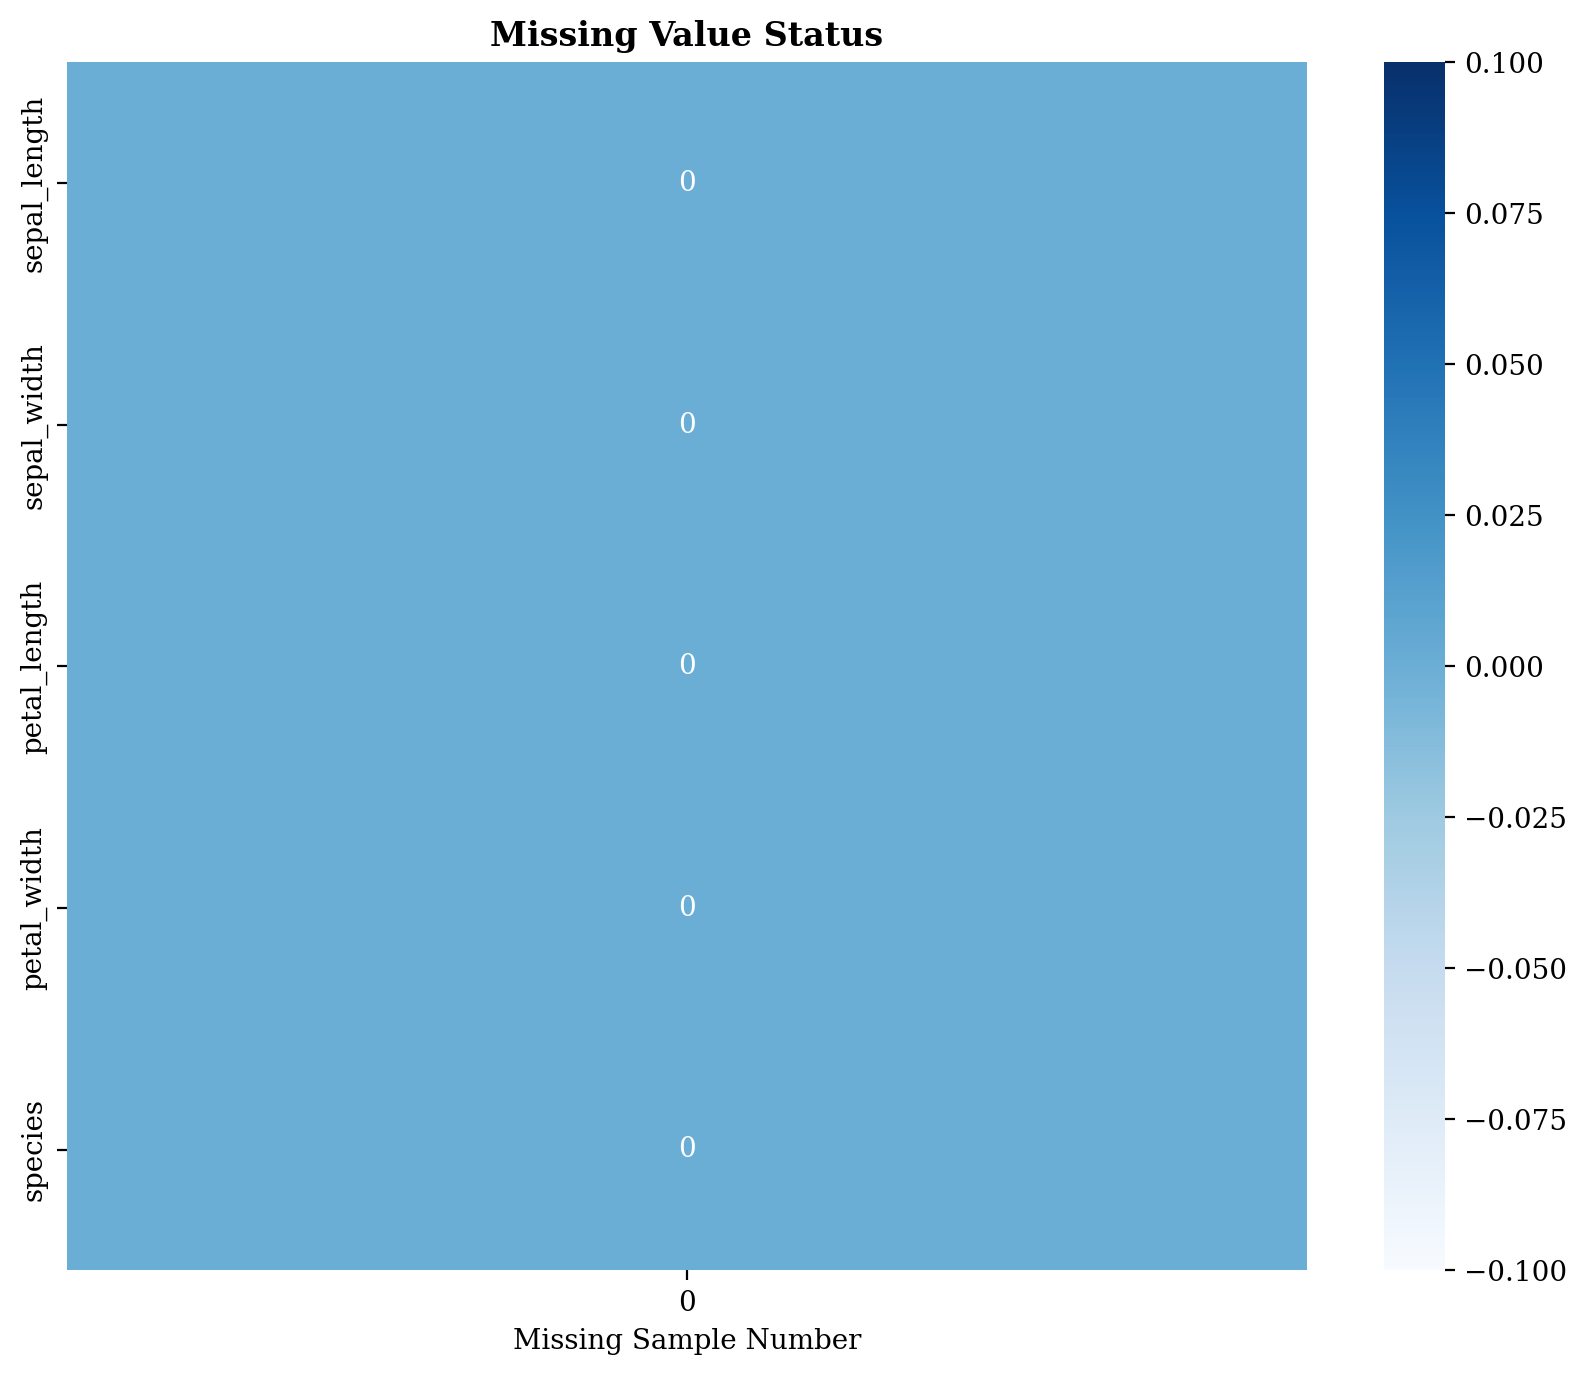

In [6]:
plot_missing_value(data)

### 3. 查看数据的直方图、箱型图、QQ图

In [7]:
def plot_distribution(data):
    n = len(data.columns)
    
    fig,ax=plt.subplots(n,3,figsize=(10*n,12*n),dpi=100)
    for index,i in enumerate(data.columns):
        ax1 = sns.distplot(data[i],ax=ax[index,0],color='#0f4c81')
        ax1.set_xlabel(i,weight='bold',fontsize=25)
        ax1.set_ylabel('')
        ax1.get_lines()[0].set_linewidth(4.0)

        ax2 = sns.boxplot(x=i,data=data,ax=ax[index,1],color="#3f64a5")
        ax2.set_xlabel(i,weight='bold',fontsize=25)

        ax3 = plt.subplot(n,3,index*3+3)
        probplot(data[i], plot=plt)
        ax3.get_lines()[0].set_markerfacecolor('#9bb7d4')
        ax3.get_lines()[0].set_alpha(0.5)
        ax3.get_lines()[1].set_color('#2f58a1')
        ax3.get_lines()[1].set_linewidth(6.0)
        ax3.set_xlabel('Theoretical quantiles', weight='bold',fontsize=25)
        ax3.set_title('')
        
        if index == 2:
            continue
        
        
    plt.tight_layout()
    plt.show()

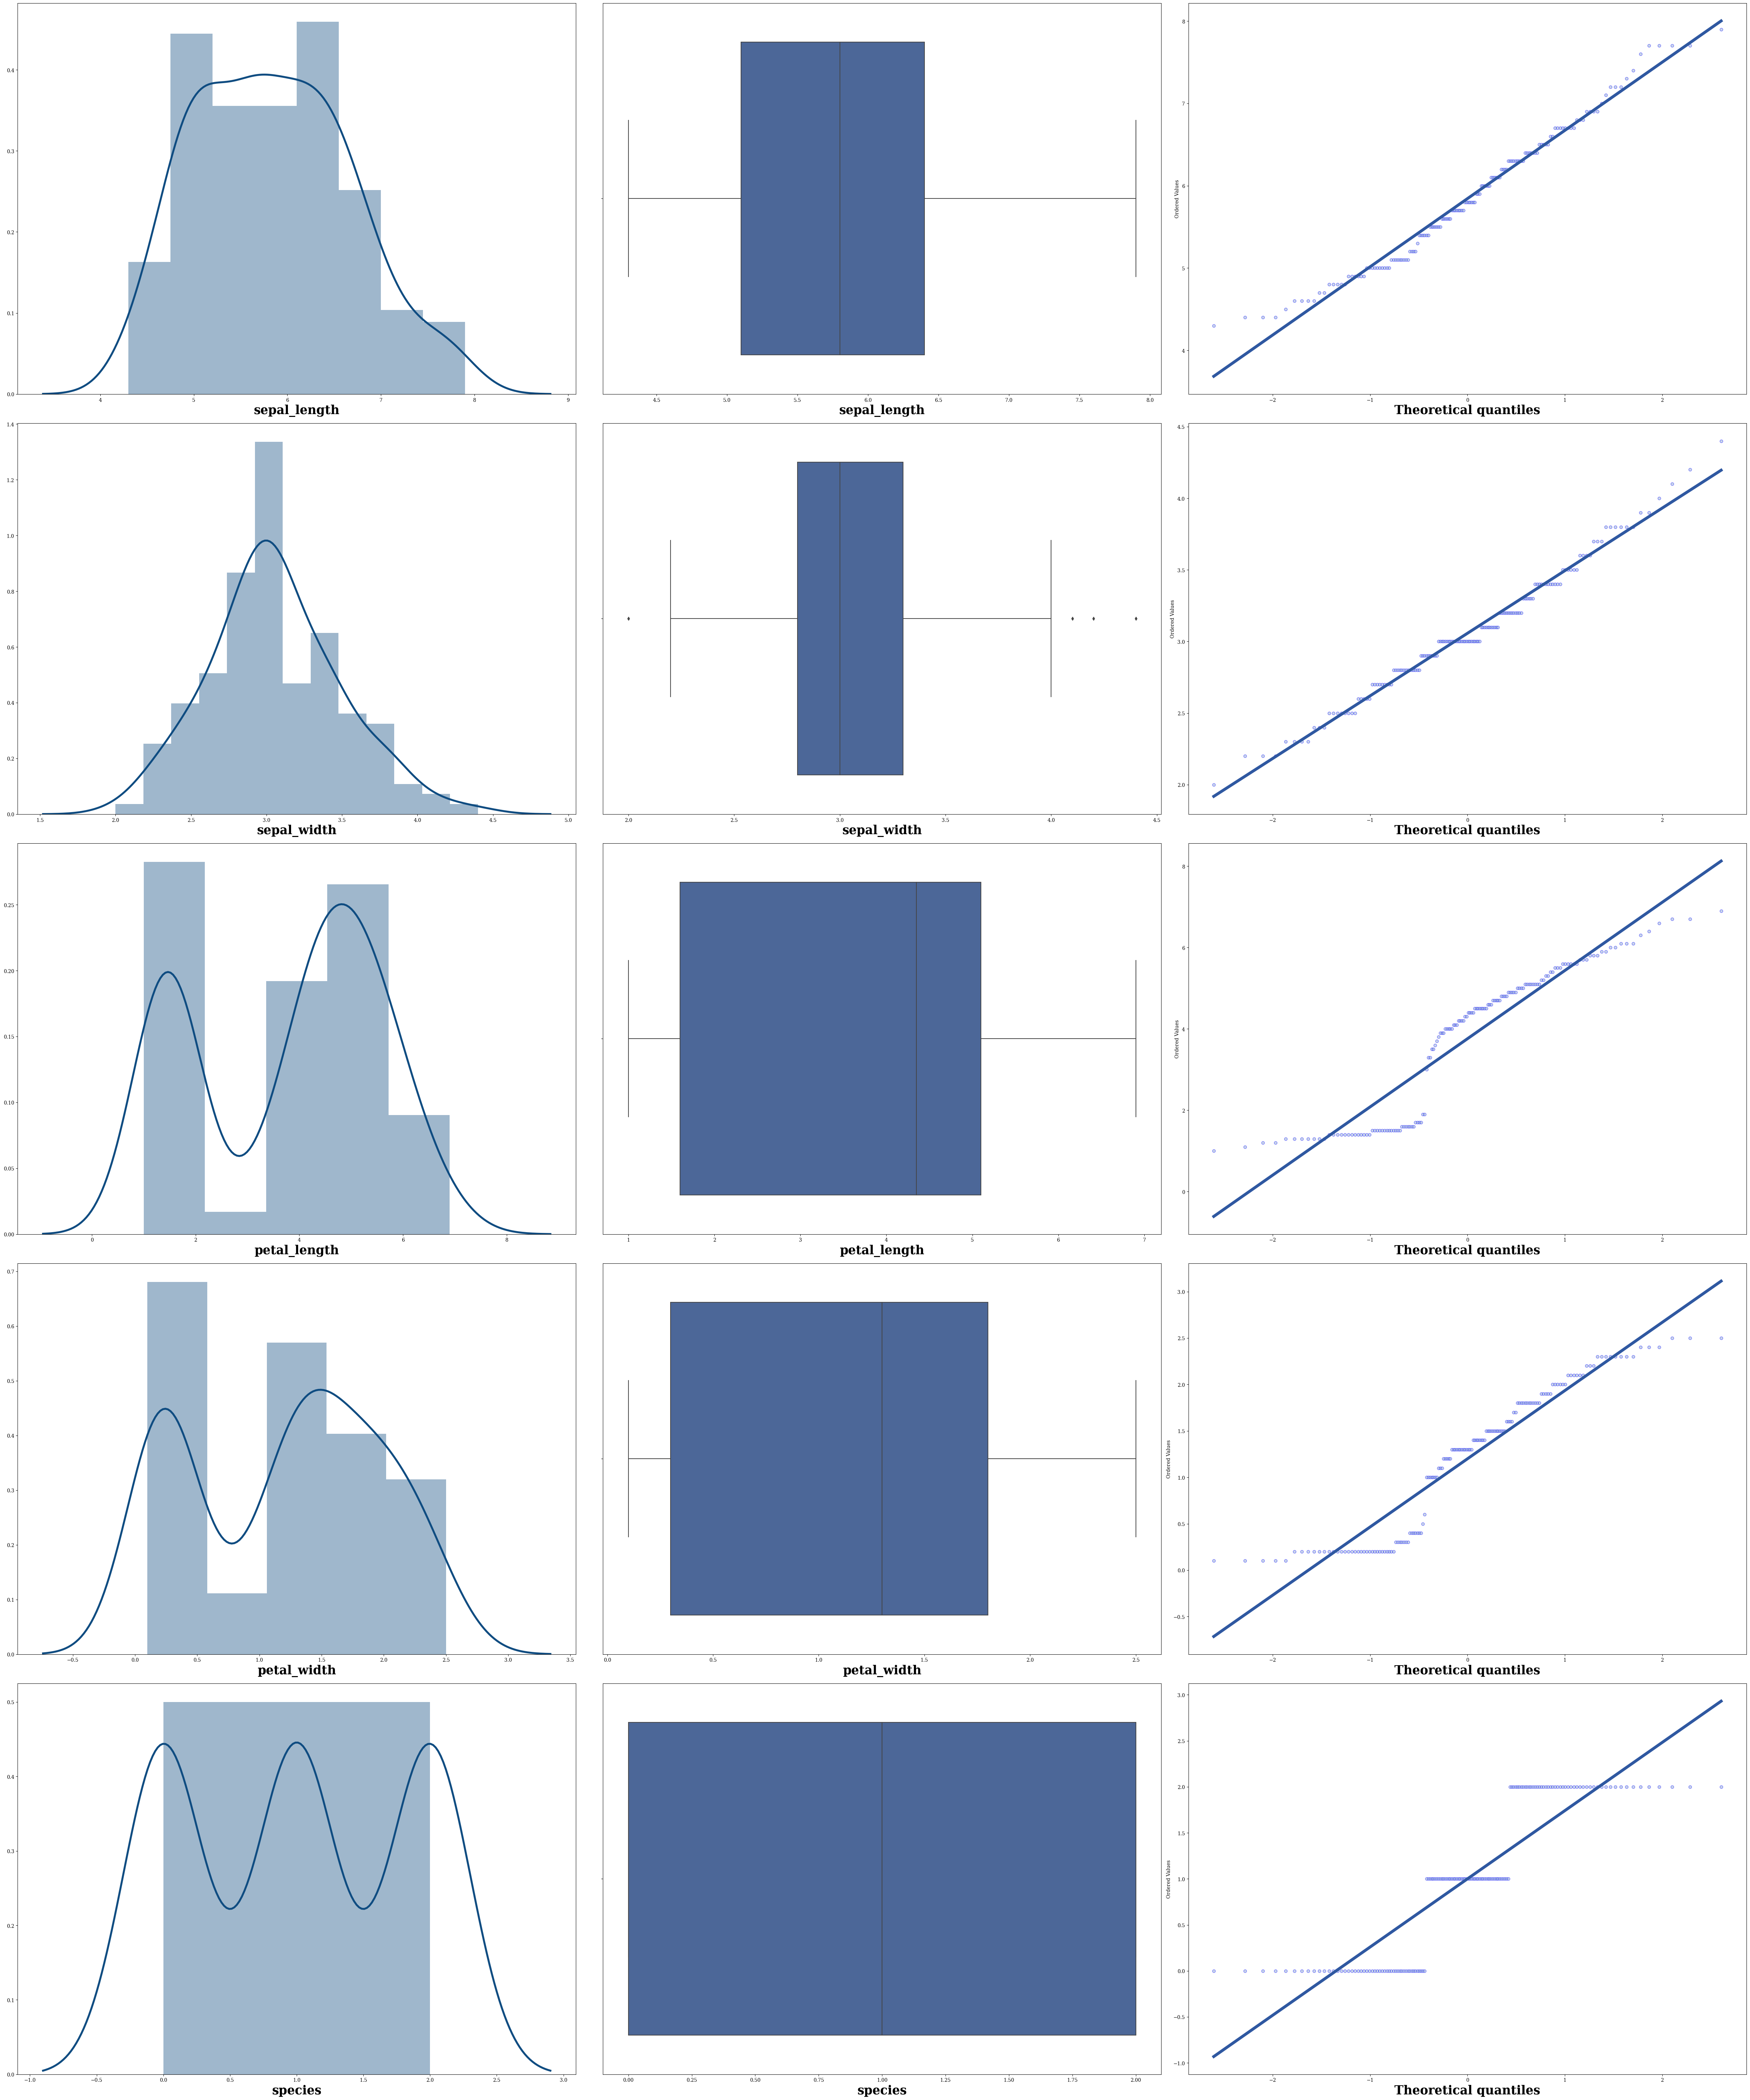

In [8]:
plot_distribution(data)

### 4. 连续型变量同分类型目标之间的关系图

In [32]:
# cols传入连续型变量列名
def plot_con_cat(df, cols=None):
    if cols == None:
        n = np.ceil(len(df.columns))
        data = df.copy()
        cols = df.columns.tolist()
    else:
        n = np.ceil(len(cols))
        data = df.loc[:,cols]
    
    
    plt.figure(figsize=(10,8),dpi=100)
    colors = ['#1E79A6','#349ECE','#54B5E2','#AAE2F8']
    species = ['setosa','virginica','versicolor']
    alphas = [1,0.7,0.5]
    
    ax1 = plt.subplot()
    for i in range(len(data['species'].unique())):
        sns.kdeplot(data[data['species'] == i][cols[0]], color=colors[i], shade=True, ec='black',label=species[i],alpha=alphas[i]) 
    
    plt.legend()
    ax1.set_ylabel('')

    plt.title('different categories vs continuous variables', fontsize=15)
    plt.legend()
    plt.show()

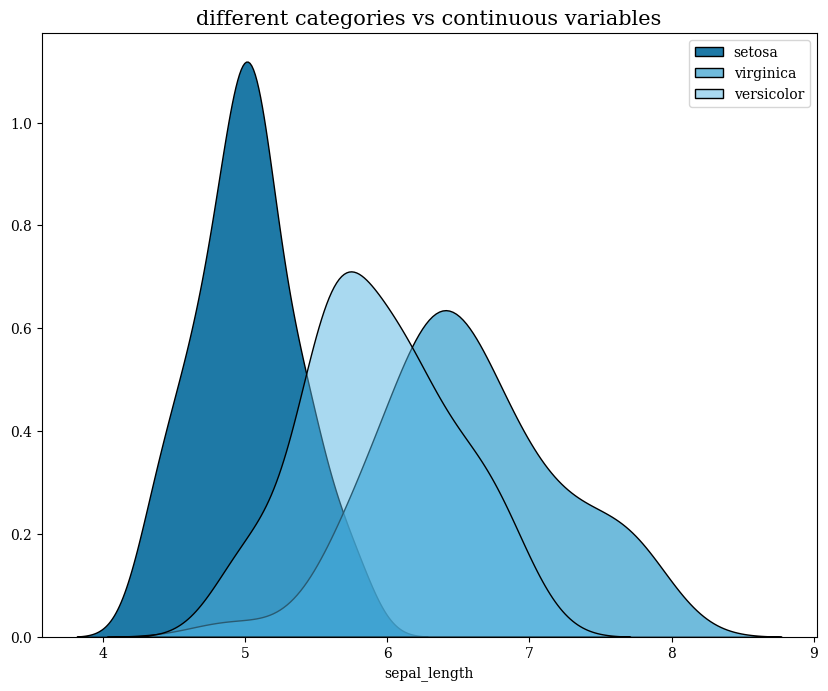

In [33]:
plot_con_cat(data)

### 5. 分类变量饼状图

In [38]:
def plot_pieplot(df, col,labels):
    colors = ['#1E79A6','#349ECE','#54B5E2','#AAE2F8']
    data = df[col].value_counts()
    
    colormap = ['firebrick','LightCoral']
    fig=plt.figure(figsize=(7,7),dpi=100)
    plt.title("Visualizing Count of classes", fontsize=10)
    plt.pie(data, labels=labels, explode=[0.05,0, 0],
            autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
    plt.legend(fontsize=10)
    plt.show()

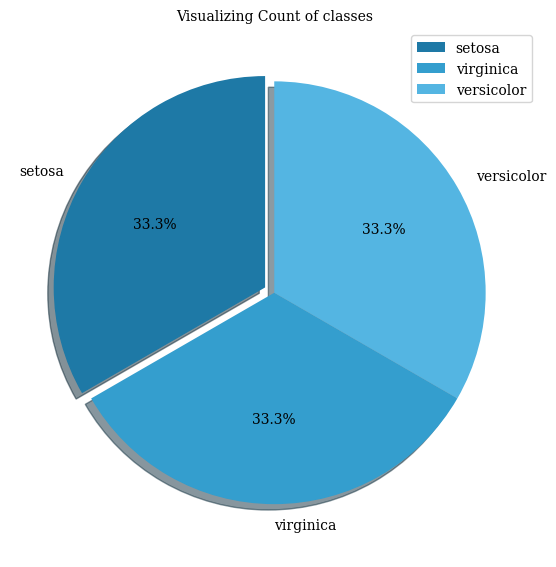

In [39]:
labels = ['setosa','virginica','versicolor']
plot_pieplot(data,'species',labels)

### 6.柱状图

In [93]:
def plot_histplot(df, palette_list):
    
    plt.figure(figsize=(12,8),dpi=200)
    ax = plt.subplot()
    
    sns.histplot(df, alpha=1,zorder=2,linewidth=1,edgecolor='black',shrink=0.5)
    
    temp_sum = sum([p.get_height() for p in ax.patches])
    
    for index,p in enumerate(ax.patches):
        p.set_color(palette_list[index])
        ax.annotate('{}%'.format(np.round(p.get_height()*100/temp_sum),2), 
                        (p.get_x()+p.get_width()/2-0.07, p.get_height()+0.6), color='black', size=10)
        
    ax.set_ylabel('')
    ax.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    for direction in ['top','right','left']:
        ax.spines[direction].set_visible(False)
    plt.show()


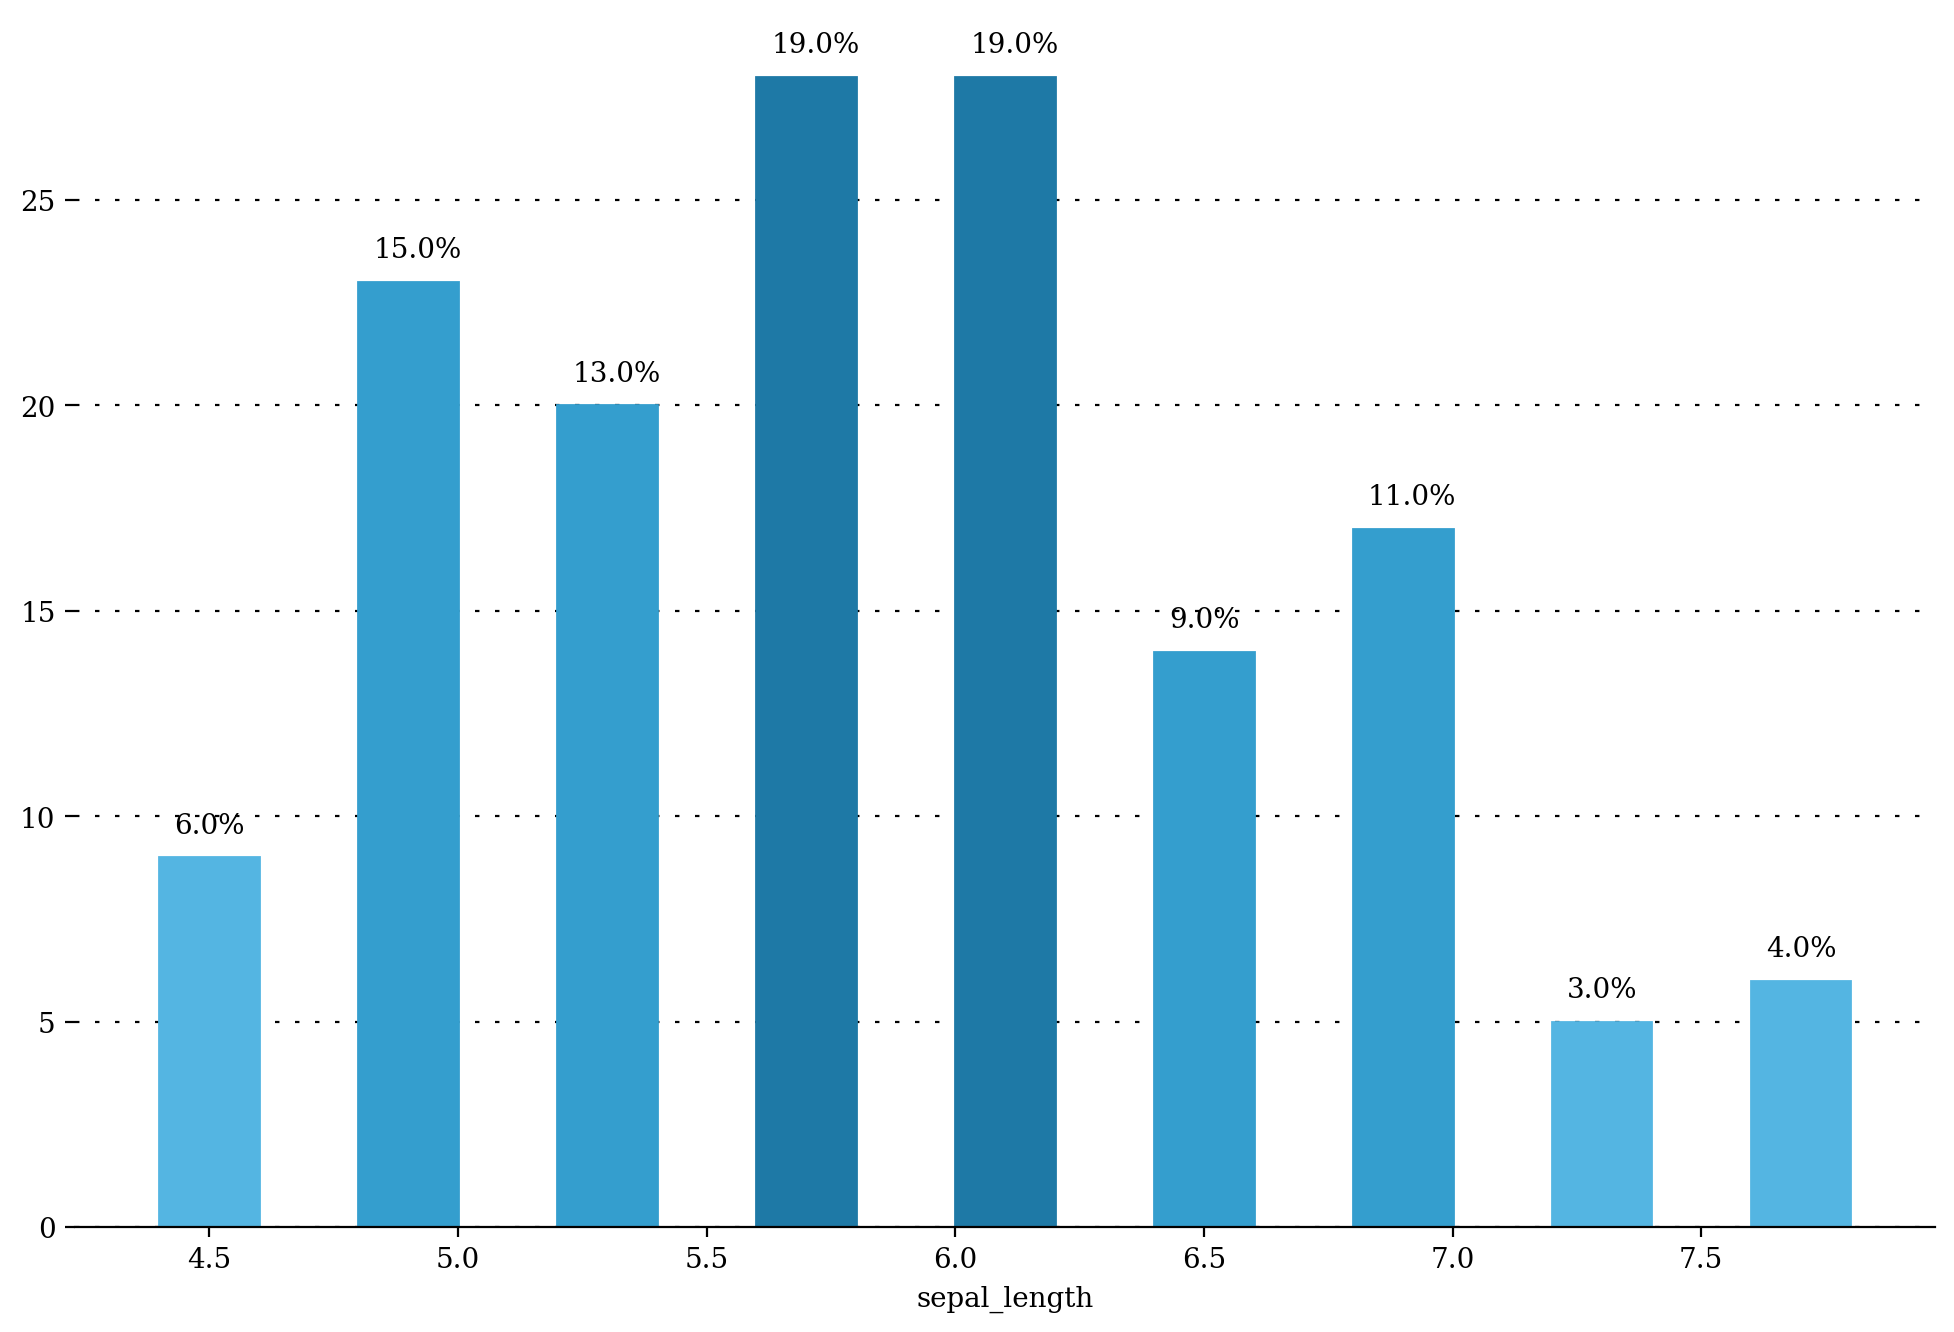

In [94]:
palette_list = ['#54B5E2' for _ in range(18)]
palette_list[1] = palette_list[2] = palette_list[5] = palette_list[6] = '#349ECE'
palette_list[3] = palette_list[4] = '#1E79A6'

plot_histplot(data['sepal_length'], palette_list)

### 7.绘制折线图

In [99]:
def plot_line(x,y1,y2):
    plt.figure(figsize=(10,8),dpi=200)
    ax = plt.subplot()
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax.plot(x, y1, 'b--', label='y1',color='#9bb7d4')
    ax.plot(x, y2, '.', linewidth=1,label='y2',color='#0f4c81')

    for direction in ['top','right','left']:
        ax.spines[direction].set_visible(False)

    plt.xlabel('x')
    plt.ylabel('value')
    plt.show()

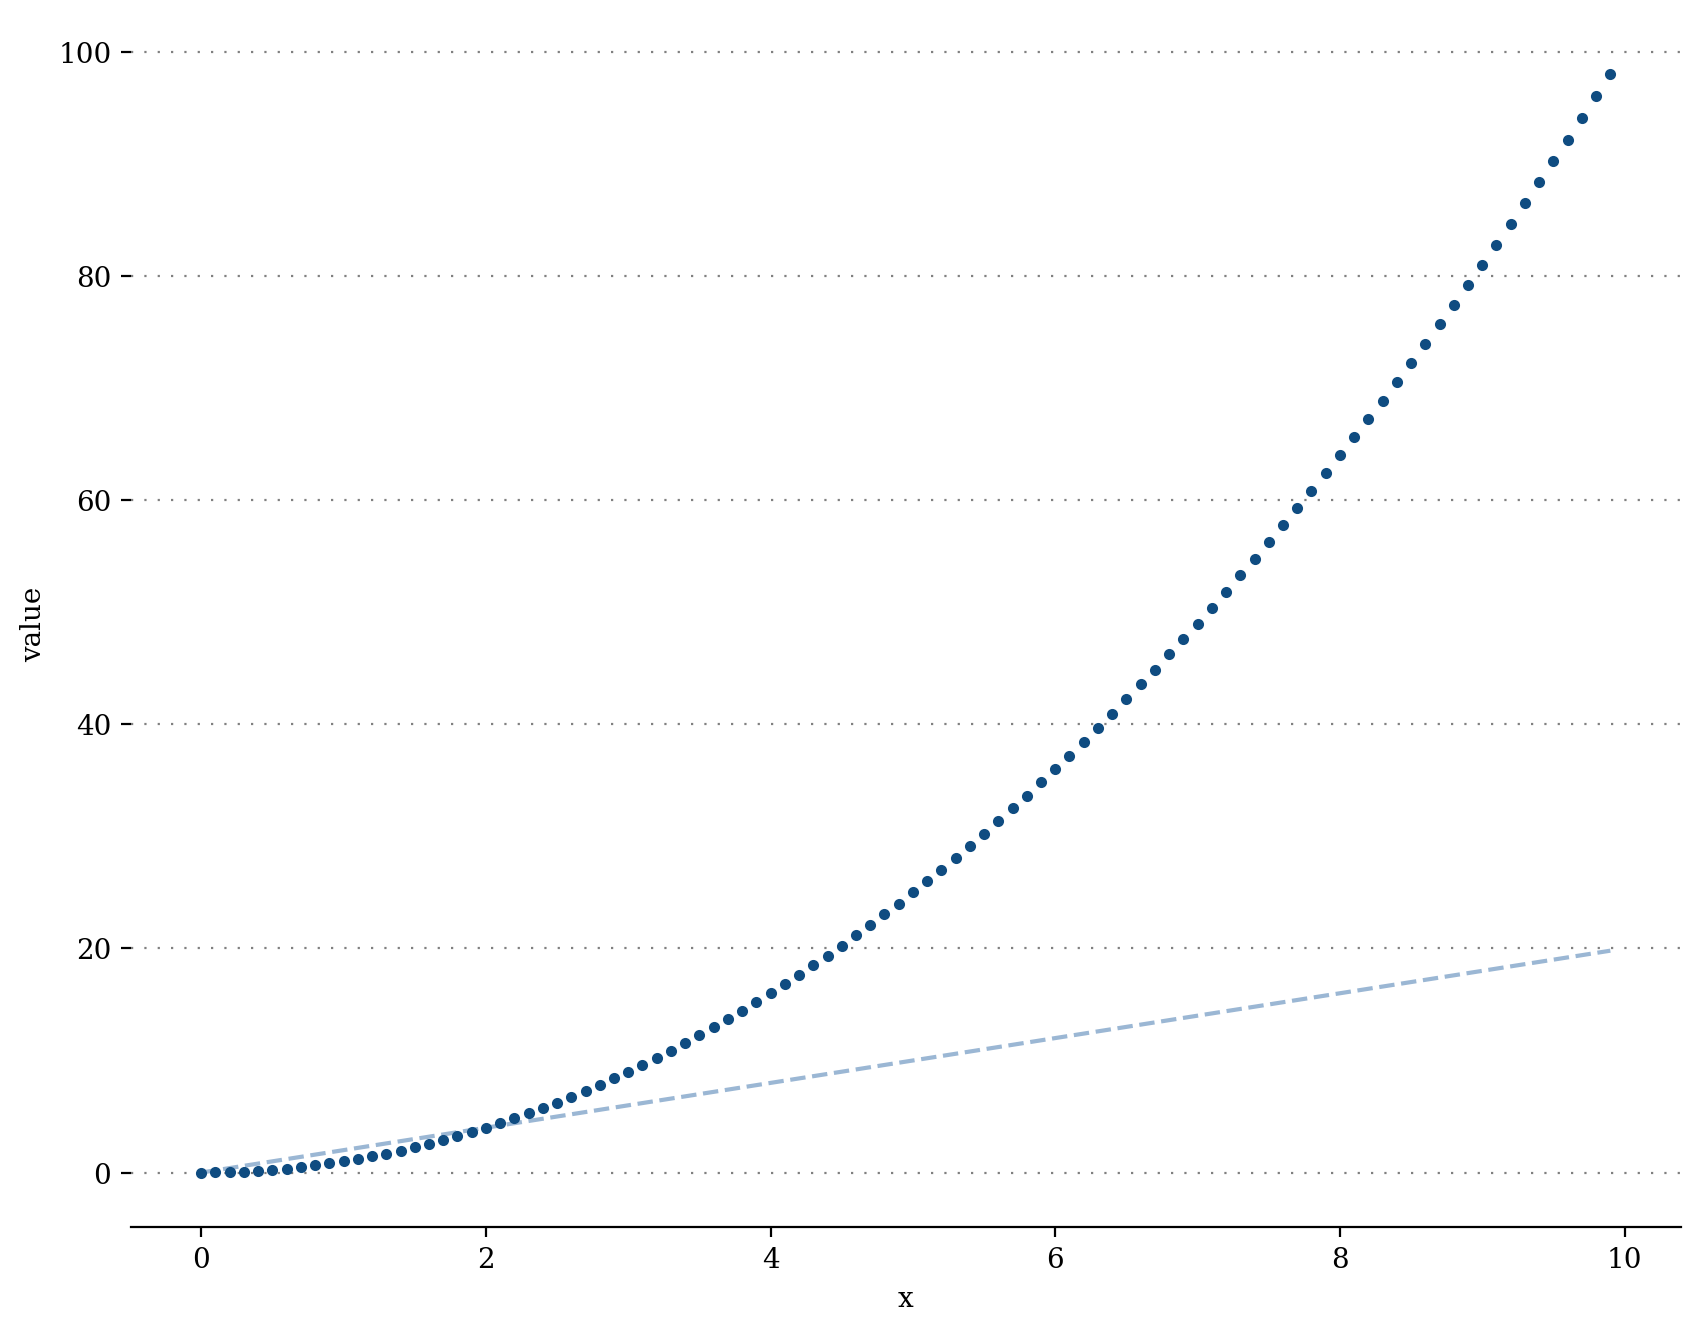

In [101]:
x1 = np.arange(0,10,0.1)
y1 = 2*x1
y2 = x1**2
plot_line(x1,y1,y2)